# Store Sales and Profit Analysis using Python

Store sales and profit analysis is the task of analyzing the performance of a retail store in terms of its sales and profits. It helps businesses identify areas for improvement and make data-driven decisions to optimize their operations, pricing, marketing, and inventory management strategies to drive revenue and growth.

Dataset Source Kaggle :- https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

In [ ]:
# DataSet Features :- 

# Row ID = Unique ID for each row.
# Order ID = Unique Order ID for each Customer.
# Order Date = Order Date of the product.
# Ship Date = Shipping Date of the Product.
# Ship Mode = Shipping Mode specified by the Customer.
# Customer ID = Unique ID to identify each Customer.
# Customer Name = Name of the Customer.
# Segment = The segment where the Customer belongs.
# Country = Country of residence of the Customer.
# City = City of residence of of the Customer.
# State = State of residence of the Customer.
# Postal Code = Postal Code of every Customer.
# Region = Region where the Customer belong.
# Product ID = Unique ID of the Product.
# Category = Category of the product ordered.
# Sub-Category = Sub-Category of the product ordered.
# Product Name = Name of the Product
# Sales = Sales of the Product.
# Quantity = Quantity of the Product.
# Discount = Discount provided.
# Profit = Profit/Loss incurred.

## Let’s start this task by importing the necessary Python libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings as w
w.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\Sample - Superstore.csv", encoding = 'latin-1')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
data.info()   # No Null Values Present in The Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# descriptive statistics of the dataset:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The dataset has an order date column. We can use this column to create new columns like order month, order year, and order day, which will be very valuable for sales and profit analysis according to time periods. So let’s add these columns

In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [10]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [11]:
data['Order Month'] = data['Order Date'].dt.month

data['Order Year'] = data['Order Date'].dt.year

data['Order Day Of Week'] = data['Order Date'].dt.dayofweek

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Ship Mode          9994 non-null   object        
 5   Customer ID        9994 non-null   object        
 6   Customer Name      9994 non-null   object        
 7   Segment            9994 non-null   object        
 8   Country            9994 non-null   object        
 9   City               9994 non-null   object        
 10  State              9994 non-null   object        
 11  Postal Code        9994 non-null   int64         
 12  Region             9994 non-null   object        
 13  Product ID         9994 non-null   object        
 14  Category

### Now let’s have a look at the monthly sales:

In [13]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
sales_by_month

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


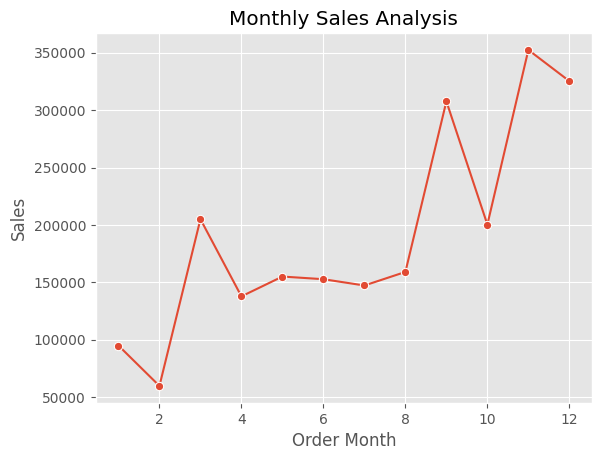

In [14]:
sns.lineplot(data = sales_by_month,
             x = 'Order Month',
             y = 'Sales' ,
             marker = 'o')

plt.title('Monthly Sales Analysis')
plt.show()

In [ ]:
# The Above Figure Shows That The November Month Has The Maximum Sales

### Now let’s have a look at the sales by category:

In [15]:
data.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [17]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


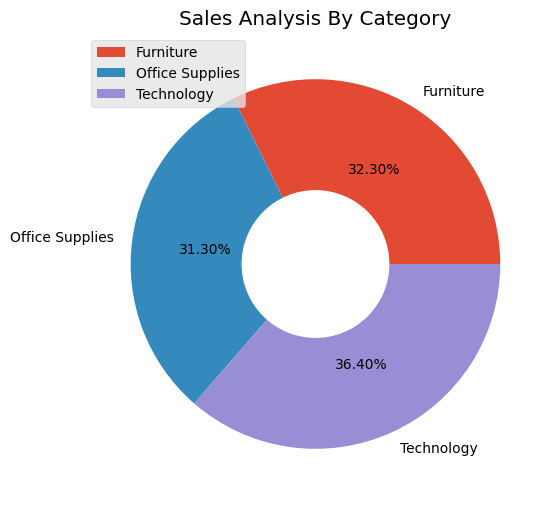

In [18]:
plt.figure( figsize = (9,6))
plt.pie(x = sales_by_category['Sales'] ,
        labels = sales_by_category['Category'],
        autopct = "%1.2f%%")

cc = plt.Circle((0,0), 0.40, fc = "white", alpha = 1)
plt.gca().add_artist(cc)

plt.legend( loc = 'upper left')
plt.title('Sales Analysis By Category')
plt.show()

In [ ]:
# Technology Category Has The Maximum Sales 

### Now let’s have a look at the sales by sub-category:

In [22]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_subcategory.sort_values( by = "Sales", ascending = False)

,Sub-Category,Sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


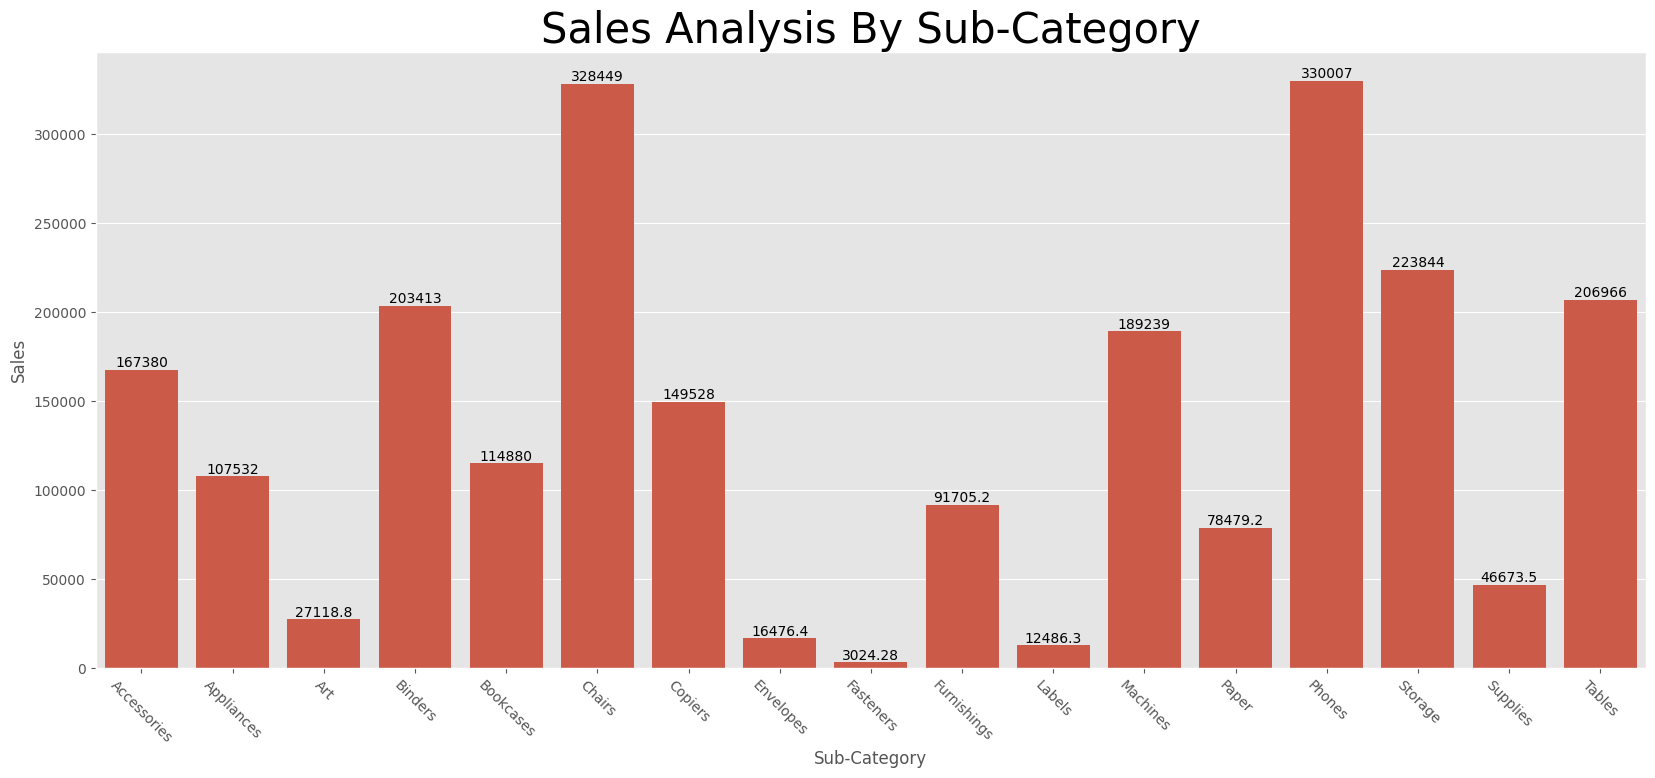

In [20]:
plt.figure( figsize = (20,8))

ax = sns.barplot( data =  sales_by_subcategory ,
            x = 'Sub-Category' ,
            y = 'Sales'
            )


for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = - 45)
plt.title('Sales Analysis By Sub-Category', fontsize = 30)
plt.show()

In [ ]:
# Top 5 Sub-Category Which Has Maximum Sales Are 

# 1) Phones
# 2) Chairs
# 3) Tables
# 4) Binders 
# 5) Machines

### Now let’s have a look at the monthly profits:

In [23]:
monthly_profits =data.groupby('Order Month')['Profit'].sum().reset_index()
monthly_profits

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


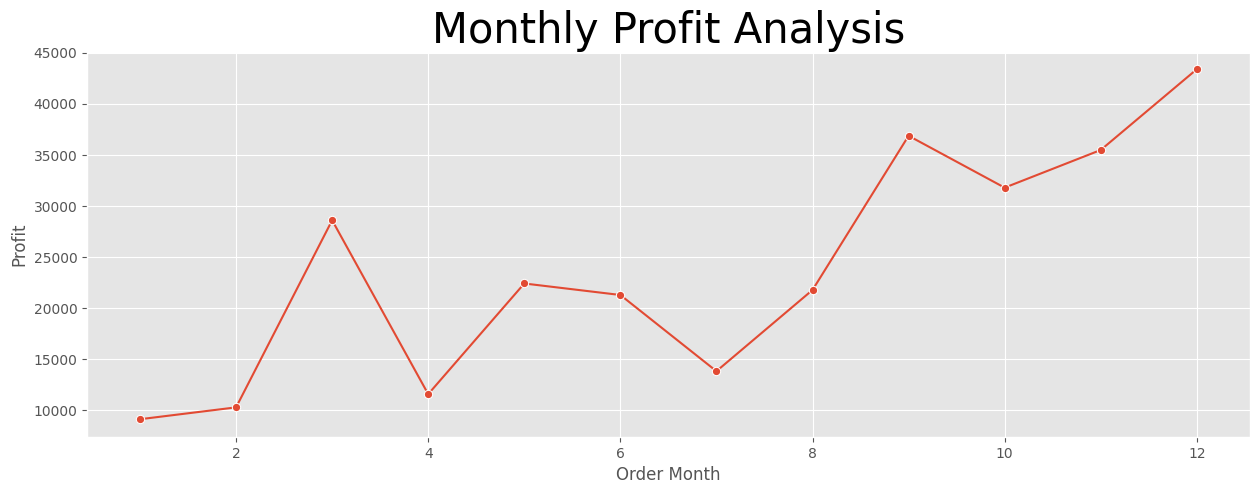

In [24]:
plt.figure( figsize = (15,5))

sns.lineplot( data = monthly_profits ,
             x = 'Order Month' ,
             y = 'Profit' ,
             marker = 'o')

plt.title('Monthly Profit Analysis', fontsize = 30)
plt.show()

In [ ]:
# Maximum Profit is in December Month

### Now let’s have a look at the profit by category:

In [25]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


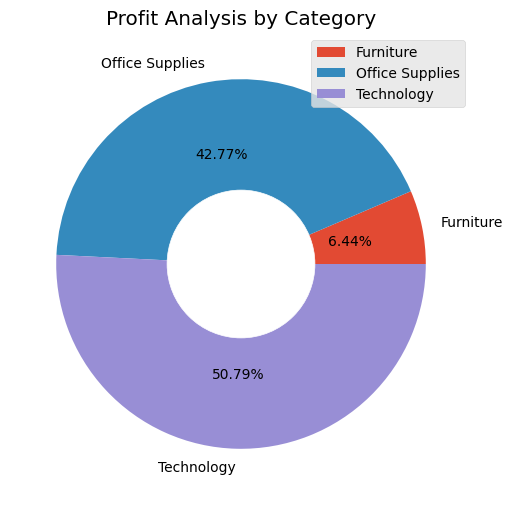

In [26]:
plt.figure( figsize = (9,6))

plt.pie( x = profit_by_category['Profit'] , 
        labels = profit_by_category['Category'] ,
        autopct = '%1.2f%%')

cc = plt.Circle((0,0), 0.4, color = 'white')
plt.gca().add_artist(cc)

plt.legend( loc = 'upper right')
plt.title('Profit Analysis by Category')
plt.show()

In [ ]:
# Technology Returns The Maximum Profit

### Now let’s have a look at the profit by sub-category:

In [29]:
profit_by_subcategory =data.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_by_subcategory.sort_values( by = "Profit", ascending = False)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


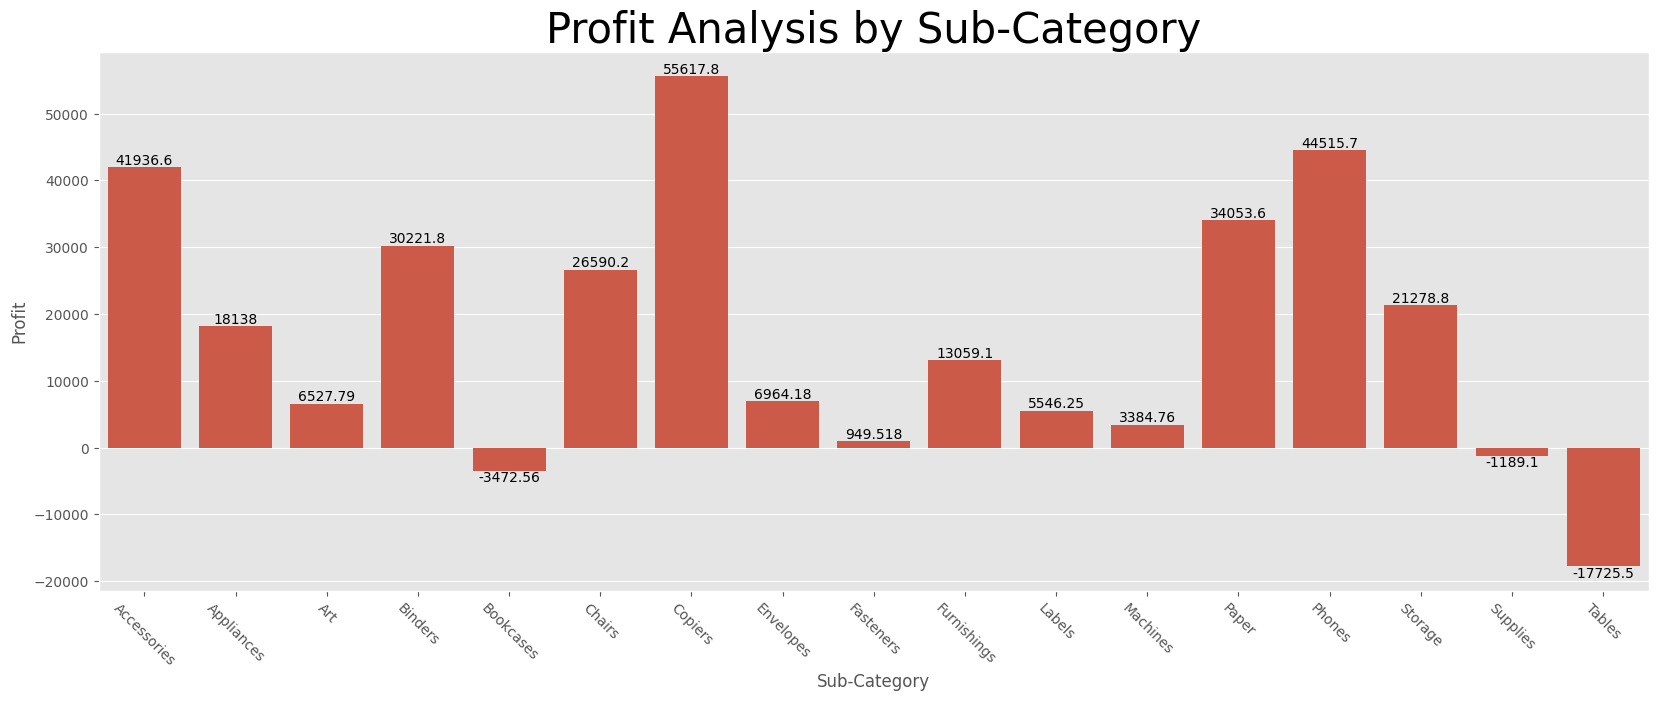

In [28]:
plt.figure( figsize = (20,7))

ax = sns.barplot( data = profit_by_subcategory ,
            x = 'Sub-Category' ,
            y = 'Profit')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Profit Analysis by Sub-Category' , fontsize = 30)
plt.xticks( rotation = -45 )
plt.show()

In [ ]:
# Top 5 Sub-Category Products that Returns maximum Profit
# 1. Copiers	
# 2. Phones	
# 3. Accessories	
# 4. Paper	
# 5. Binders	

### Now let’s have a look at the sales and profit analysis by customer segments:

In [30]:
sales_profit_by_segment = data.groupby('Segment').agg({'Profit':'sum', 'Sales': 'sum'}).reset_index()
sales_profit_by_segment

,Segment,Profit,Sales
0,Consumer,134119.2092,1.161401e+06
1,Corporate,91979.1340,7.061464e+05
2,Home Office,60298.6785,4.296531e+05


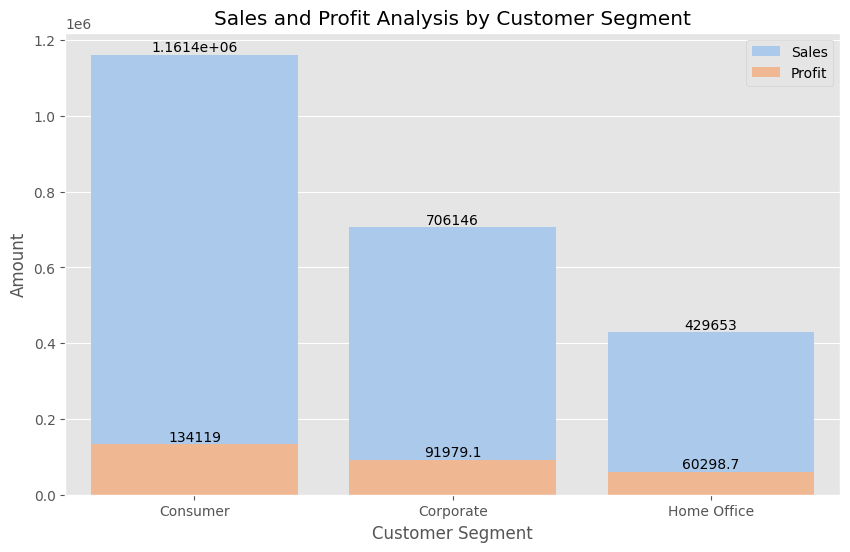

In [40]:

color_palette = sns.color_palette("pastel")

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x='Segment', y='Sales', data=sales_profit_by_segment, color=color_palette[0], label='Sales', ax=ax)

ax = sns.barplot(x='Segment', y='Profit', data=sales_profit_by_segment, color=color_palette[1], label='Profit', ax=ax)

for i in ax.containers:
    ax.bar_label(i)

ax.set_title('Sales and Profit Analysis by Customer Segment')
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Amount')

ax.legend()

plt.savefig(r"C:\Users\areeb\Downloads\Customer Segments Insights.png" , bbox_inches='tight')

plt.show()

So the store has higher profits from the product sales for consumers, but the profit from corporate product sales is better in the sales-to-profit ratio. Let’s have a look at it to validate our findings:

In [32]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


# Summary

Store sales and profit analysis help businesses identify areas for improvement and make data-driven decisions to optimize their operations, pricing, marketing, and inventory management strategies to drive revenue and growth.